# CNN (B)uild and (T)rain tutorial on CIFAR10 dataset

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from keras import backend as keras
from keras.layers import *
from keras.models import Model

from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input, decode_predictions

from keras.preprocessing import image
from keras.preprocessing.image import load_img

from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


from keras import backend as K

from CNN_utils import *
from Cifar_utils import *

Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = (8,8) # Make the figures a bit bigger

# Load dataset

In [ ]:
#Load data (~160MB)
((trainX, trainY), (testX, testY)) = cifar10.load_data()

In [4]:
CIFAR_DIR = 'cifar-10-batches-py'
((trainX, trainY), (testX, testY)) = get_images_from_files(CIFAR_DIR)

Unpickle the data
Setting Up Training Images and Labels
Setting Up Test Images and Labels
Dataset loaded successfully


In [5]:
# Inspect the dataset:
print('Size of training data: '+str(trainX.shape))
print('Labels in training data: '+str(trainY.shape))
print('   ')
print('Size of test data: '+str(testX.shape))
print('Labels in test data: '+str(testY.shape))


Size of training data: (50000, 32, 32, 3)
Labels in training data: (50000,)
   
Size of test data: (10000, 32, 32, 3)
Labels in test data: (10000,)


In [6]:
classes = ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck']

In [8]:
# one-hot encode the training and testing labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

In [9]:
#set-up batch generation and image preprocessing

train_datagen = ImageDataGenerator(rescale=1./255)

#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=True)

train_set = train_datagen.flow(
        trainX, trainY,
        batch_size=16)

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow(
        testX, testY,
        batch_size=4)

Let's look at some examples of the training data

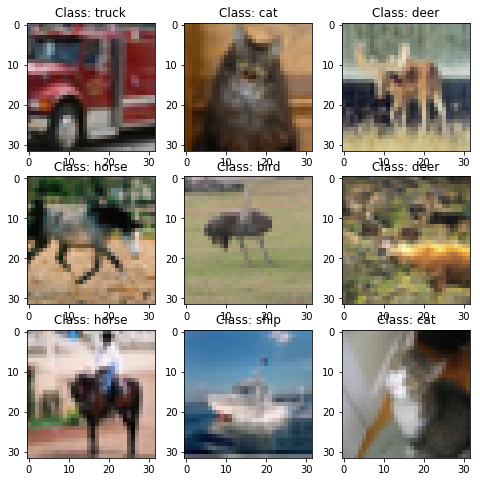

In [10]:
for i in range(9):
    plt.subplot(3,3,i+1)
    my_random = i+np.random.randint(100)
    plt.imshow(trainX[my_random,::], interpolation='none') #, cmap='gray'
    temp_class = np.argmax(trainY[my_random,::])
    plt.title("Class: {}".format(classes[temp_class]))

# CNN

## Building model

In [11]:
input_size = (32,32,3)
#initial layer
inputs = Input(input_size)

# block 1 (filters with size 32)
x = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
x = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# block 2 (filters with size 64)



# block 3 (filters with size 128)




# final block 
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
out = Dense(10, activation='softmax')(x)

model = Model(inputs, out)

In [12]:
# Model preparation
adamopt = Adam(lr=1e-4, decay=1e-6) #Adam(lr=1e-6, decay=1e-8)
model.compile(optimizer=adamopt, loss='categorical_crossentropy', metrics=['accuracy'])


## Training!

In [13]:
hist = model.fit_generator(
        train_set,
        steps_per_epoch=1000,
        epochs=2, #25
        validation_data=test_set,
        validation_steps=1000)

Epoch 1/2
1000/1000 [==============================] - 22s 22ms/step - loss: 1.7654 - acc: 0.3681 - val_loss: 1.5416 - val_acc: 0.4637
Epoch 2/2
1000/1000 [==============================] - 19s 19ms/step - loss: 1.4596 - acc: 0.4833 - val_loss: 1.3590 - val_acc: 0.5205


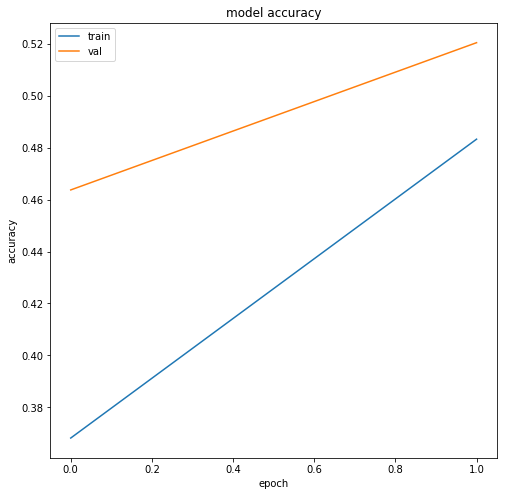

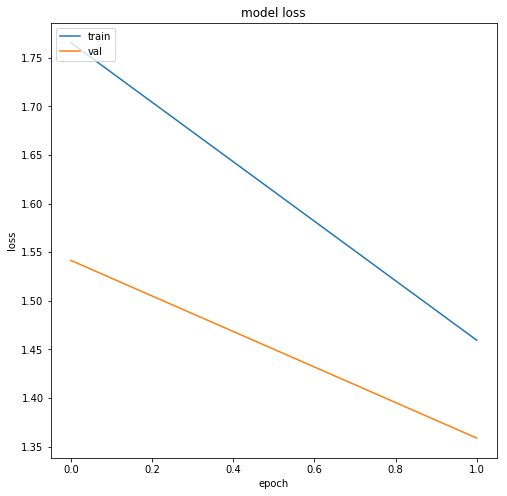

In [14]:
print_learning_acc(hist.history)

In [15]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('Model accuracy -> %.3f' % (acc * 100.0))

10000/10000 [==============================] - 2s 197us/step
Model accuracy -> 50.760


## Inference
We set the image from test_set as input to the network and get predictions from the output layer of the network.

Inference results: (prediction/ground_truth)


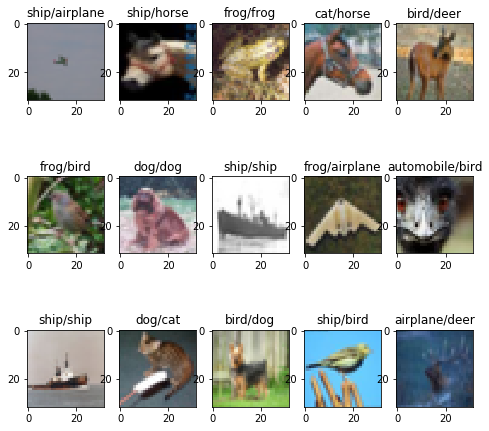

In [16]:
print("Inference results: (prediction/ground_truth)")
for i in range(15):
    plt.subplot(3,5,i+1)
    my_random = i+np.random.randint(100)
    im = testX[my_random,::]
    plt.imshow(im, interpolation='none') #, cmap='gray'
    
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)

    temp_class = np.argmax(preds[0])
    
    title_string = classes[temp_class] + "/" + classes[np.argmax(testY[my_random])]
    plt.title(title_string)
    
    #plt.title("Class {}".format(classes[temp_class]))
    

Probaility for all classes:
0.000  :  airplane
0.000  :  automobile
0.000  :  bird
0.988  :  cat
0.000  :  deer
0.000  :  dog
0.012  :  frog
0.000  :  horse
0.000  :  ship
0.000  :  truck


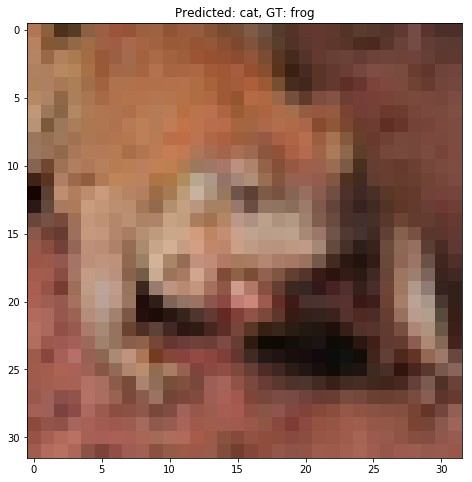

In [17]:
idx = 5 #54


im = testX[idx,::]
plt.imshow(im)

x = image.img_to_array(im)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)

temp_class = np.argmax(preds[0])
title_string = "Predicted: "+classes[temp_class] + ", GT: " + classes[np.argmax(testY[idx])]
plt.title(title_string)

print('Probaility for all classes:')
for i in range(10):
    print("%2.3f"% (preds[0][i]),' : ',classes[i])

## Summary
Pretrained networks are a good way to start your project as they are usually trained on large amounts of data and using resources that aren’t usually available to everyone. Based on the feature maps inside CNN you can see the focus (attention) of the network as well as perform coarse localisation.